In [47]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('RGI2000-v7.0-G-01_alaska-attributes.csv')
df.head()

,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m
0,RGI2000-v7.0-G-01-00001,1,01-01,G204091E67414N,392889,624,2008-09-02T00:00:00,-155.909404,67.413726,5,...,67.416034,1485.3176,1693.6235,1544.6694,1553.9403,17.606613,342.330469,1,COPDEM30,725
1,RGI2000-v7.0-G-01-00002,1,01-01,G204121E67419N,392890,624,2008-09-02T00:00:00,-155.879114,67.419232,5,...,67.421273,1278.4006,1394.7657,1328.5566,1330.9150,19.846369,345.367012,1,COPDEM30,484
2,RGI2000-v7.0-G-01-00003,1,01-01,G204471E67431N,392897,624,2008-09-02T00:00:00,-155.530786,67.431484,5,...,67.435694,1294.7034,1704.7420,1423.2068,1437.2352,23.690063,13.467490,1,COPDEM30,1099
3,RGI2000-v7.0-G-01-00004,1,01-01,G204497E67431N,392899,624,2008-09-02T00:00:00,-155.501948,67.430514,5,...,67.433367,1224.1788,1286.8977,1249.6306,1249.0662,12.782562,42.854332,2,COPDEM30,652
4,RGI2000-v7.0-G-01-00005,1,01-01,G204521E67429N,392901,624,2008-09-02T00:00:00,-155.478173,67.432873,5,...,67.438901,1052.4401,1488.1299,1290.8923,1273.7834,17.148510,299.058193,8,COPDEM30,1903


In [49]:
df.columns

Index(['rgi_id', 'o1region', 'o2region', 'glims_id', 'anlys_id', 'subm_id',
       'src_date', 'cenlon', 'cenlat', 'utm_zone', 'area_km2', 'primeclass',
       'conn_lvl', 'surge_type', 'term_type', 'glac_name', 'is_rgi6',
       'termlon', 'termlat', 'zmin_m', 'zmax_m', 'zmed_m', 'zmean_m',
       'slope_deg', 'aspect_deg', 'aspect_sec', 'dem_source', 'lmax_m'],
      dtype='object')

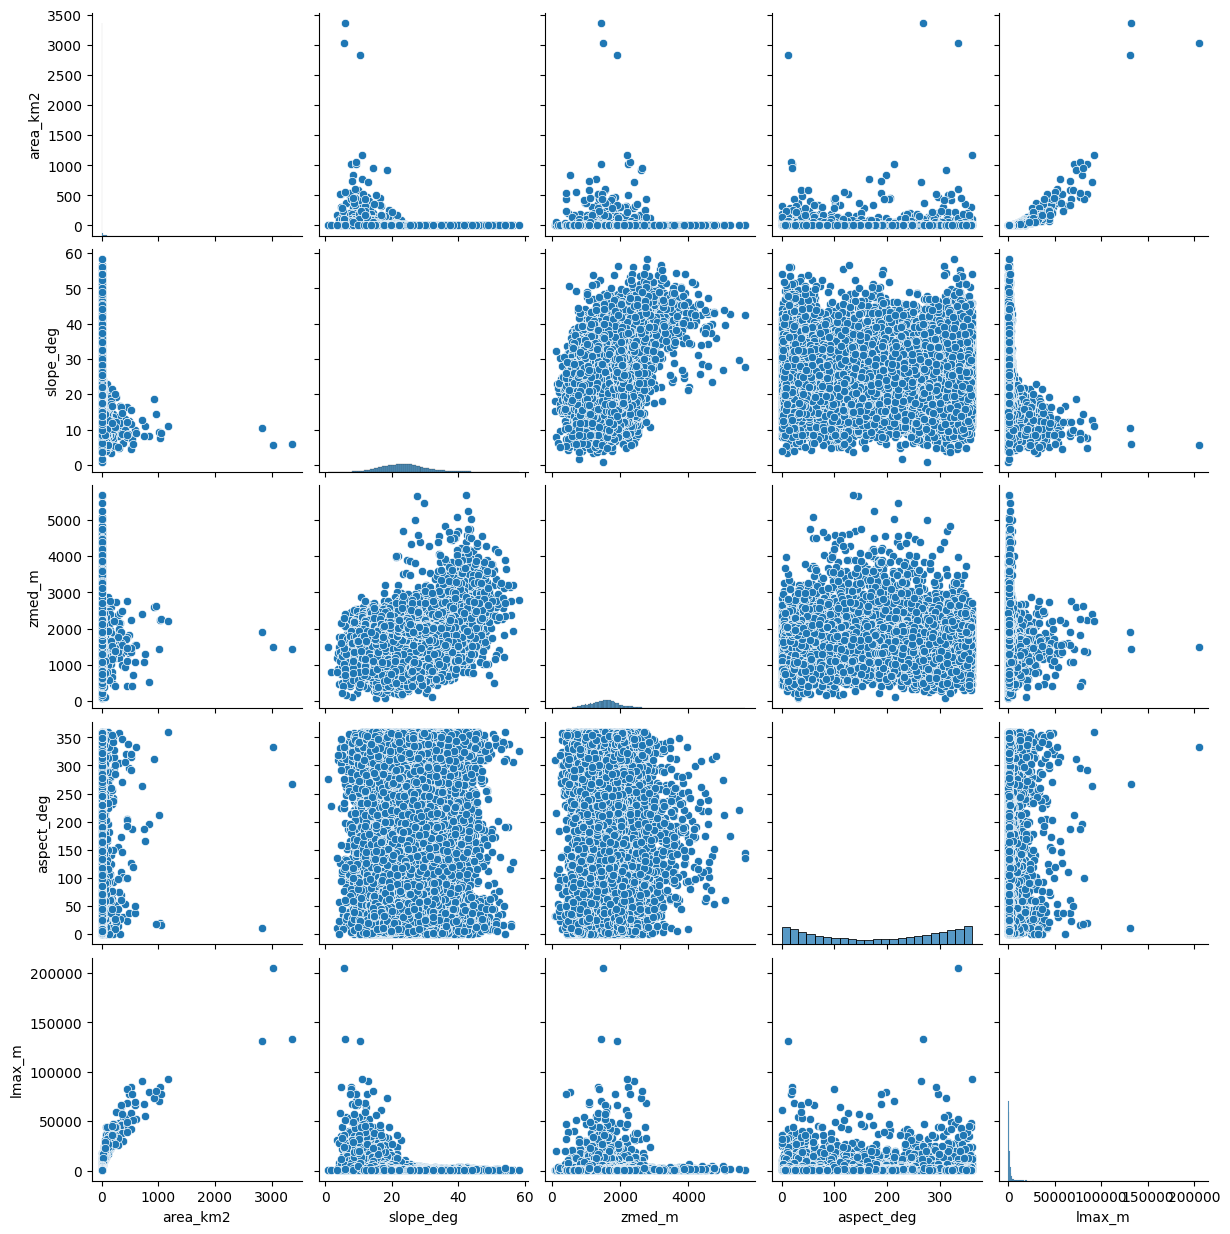

In [50]:
sns.pairplot(df[['area_km2', 'slope_deg', 'zmed_m', 'aspect_deg', 'lmax_m']])

<Axes: xlabel='slope_deg', ylabel='Count'>

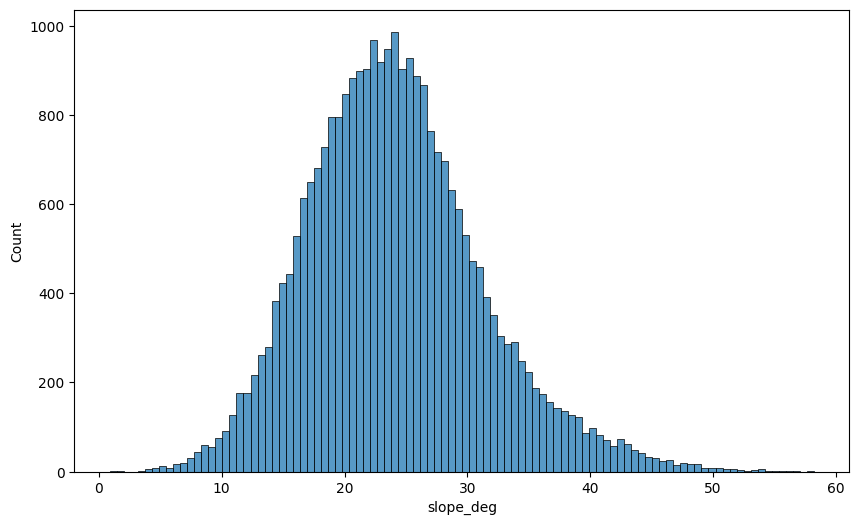

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['slope_deg'], bins=100)

<Axes: xlabel='zmed_m', ylabel='Count'>

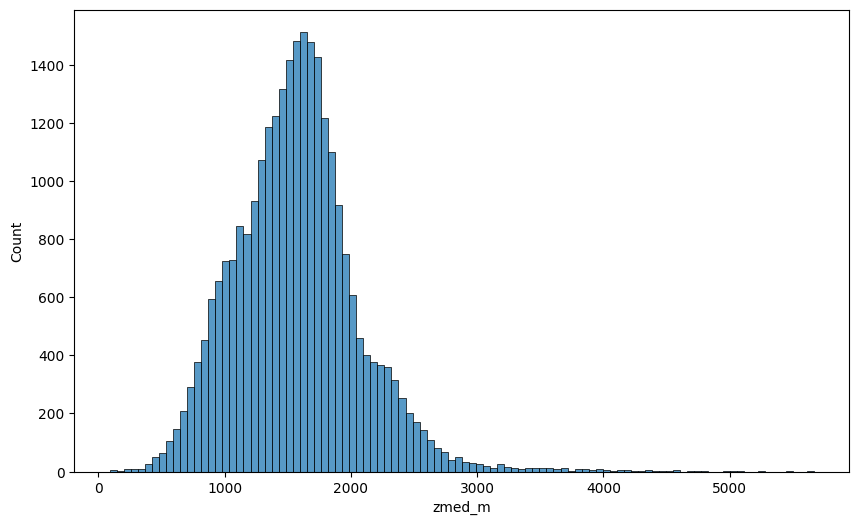

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['zmed_m'], bins=100)

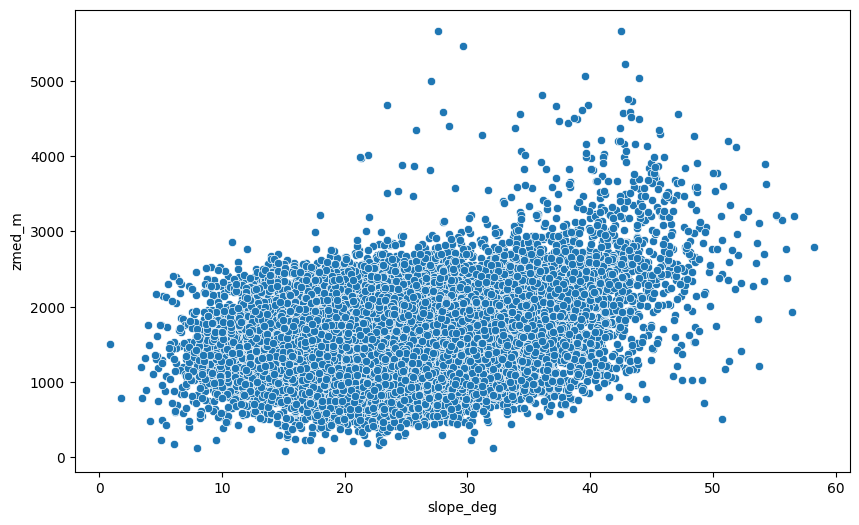

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='slope_deg', y='zmed_m', ax=ax)
plt.show()

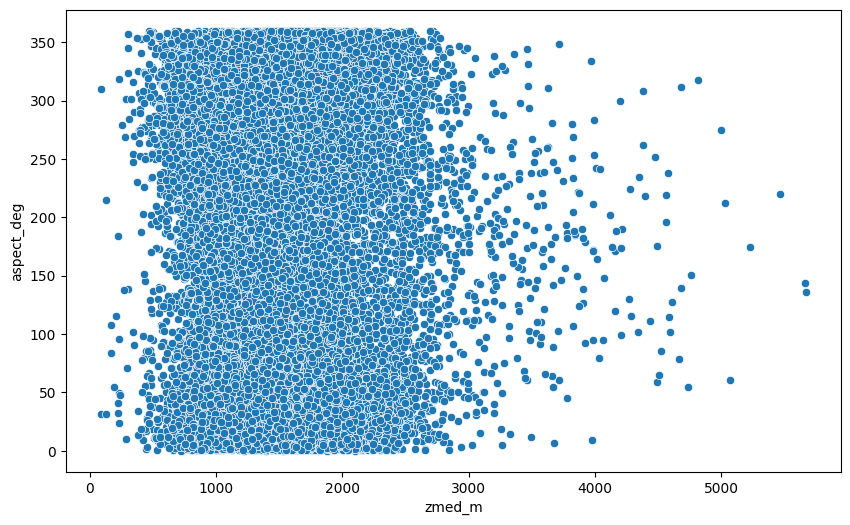

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='zmed_m', y='aspect_deg', ax=ax)
plt.show()

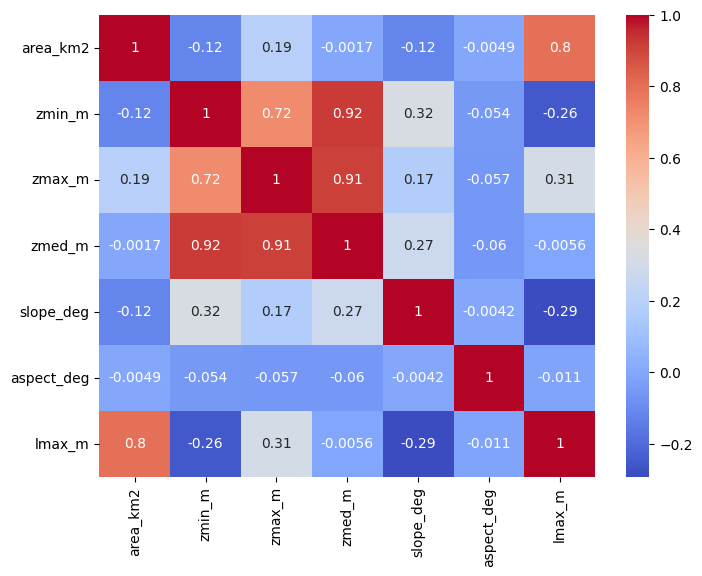

In [55]:
corr_matrix = df[['area_km2', 'zmin_m', 'zmax_m', 'zmed_m', 'slope_deg', 'aspect_deg', 'lmax_m']].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
cols = ['area_km2', 'zmin_m', 'zmax_m', 'zmed_m', 'slope_deg', 'aspect_deg', 'lmax_m']
data_nona = df[cols].dropna()
# data_centered = data_nona - data_nona.mean()

In [83]:
U, S, vT = np.linalg.svd(data_nona, full_matrices=False)

principle_components = U * S

variance = S**2 / (len(data_nona) - 1)
explained_variance_ratio = variance / variance.sum()

for i in range(len(explained_variance_ratio)):
    print(f"Principal Component {i+1}: {explained_variance_ratio[i]:.4f} of variance explained") 

Principal Component 1: 0.7660 of variance explained
Principal Component 2: 0.2319 of variance explained
Principal Component 3: 0.0013 of variance explained
Principal Component 4: 0.0007 of variance explained
Principal Component 5: 0.0001 of variance explained
Principal Component 6: 0.0000 of variance explained
Principal Component 7: 0.0000 of variance explained


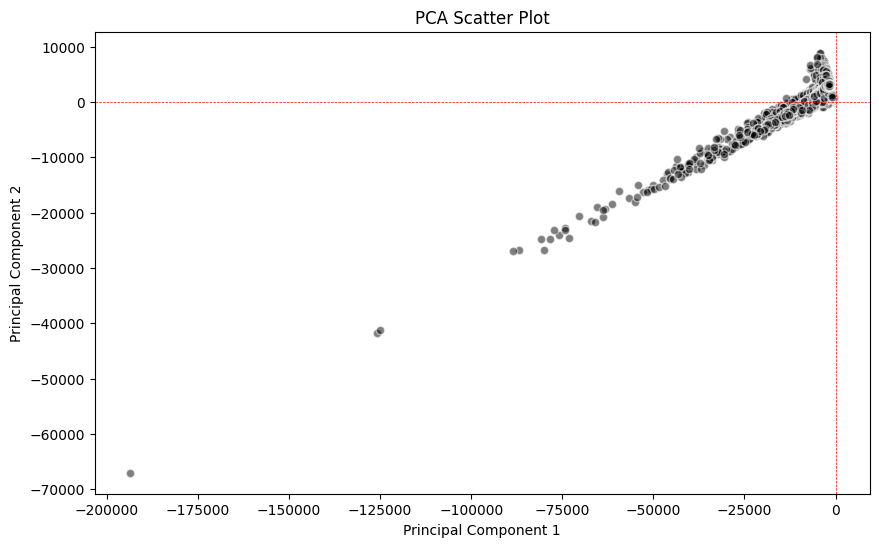

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(principle_components[:, 0], principle_components[:, 1], alpha=0.5 , color='k', edgecolors='w')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.axhline(y=0, color='r', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='r', linestyle='--', linewidth=0.5)
ax.set_title('PCA Scatter Plot')
plt.show()

In [85]:
loadings = pd.DataFrame(vT.T, index=cols, columns=[f'PC{i+1}' for i in range(len(cols))])
print(loadings[['PC1', 'PC2']])

                 PC1       PC2
area_km2   -0.006337 -0.006077
zmin_m     -0.143321  0.495772
zmax_m     -0.253068  0.580017
zmed_m     -0.193879  0.542765
slope_deg  -0.002536  0.008095
aspect_deg -0.021938  0.056715
lmax_m     -0.936642 -0.346232


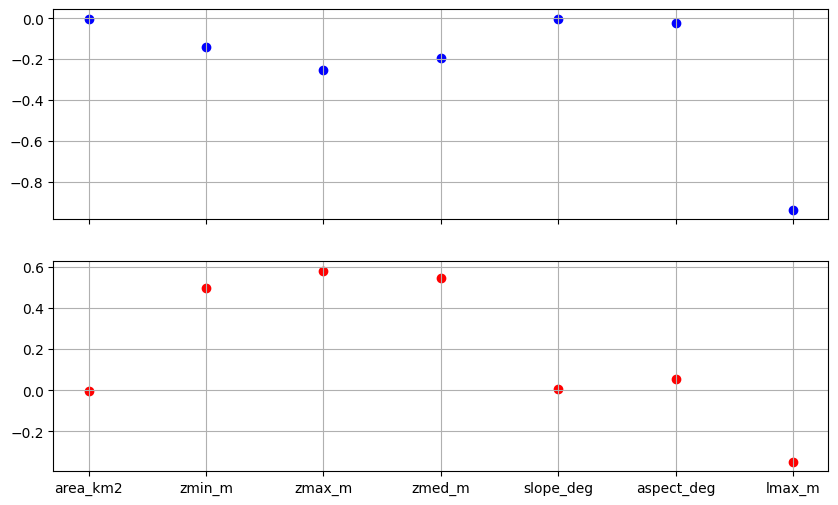

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
x = np.arange(len(cols))

ax1 = ax[0]
ax1.scatter(x, loadings['PC1'], color='b', label='PC 1')
ax1.set_xticks(x)
ax1.grid()
ax1.set_xticklabels(cols, rotation=45)

ax2 = ax[1]
ax2.grid()
ax2.scatter(x, loadings['PC2'], color='r', label='PC 2')